# **Identifying a normal distribution**

Linear models assume that the independent variables are normally distributed. In this work, we will learn how to assess normal distributions of variables.

In [8]:
import pandas as pd
import numpy as np

# for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# for the Q-Q plots
import scipy.stats as stats

# the dataset for the demo
from sklearn.datasets import fetch_california_housing

In [9]:
# load the the fetch_california House price data

# this is how we load the fetch_california dataset from sklearn
fetch_california_dataset = fetch_california_housing()

# create a dataframe with the independent variables
fetch_california = pd.DataFrame(fetch_california_dataset.data,
                      columns=fetch_california_dataset.feature_names)


fetch_california.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [10]:
# this is the information about the fetch_california house prince dataset
# get familiar with the variables before continuing with
# the notebook

# the aim is to predict the "Median value of the houses"
# MEDV column of this dataset

# and we have variables with characteristics about
# the homes and the neighborhoods

print(fetch_california_dataset.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [11]:
# I will create a dataframe with the variable x that
# follows a normal distribution

# this will provide the expected plots
# i.e., how the plots should look like if the
# assumption is met

np.random.seed(29) # for reproducibility

n = 200 # in the book, we pass 200 within brackets directly, without defining n
x = np.random.randn(n)

data = pd.DataFrame([x]).T
data.columns = ['x']
data.head()

,x
0,-0.417482
1,0.706032
2,1.915985
3,-2.141755
4,0.719057


Normality can be assessed by histograms:

<ipython-input-12-bc3a21f3a707>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['x'], bins=30)


<Axes: xlabel='x', ylabel='Density'>

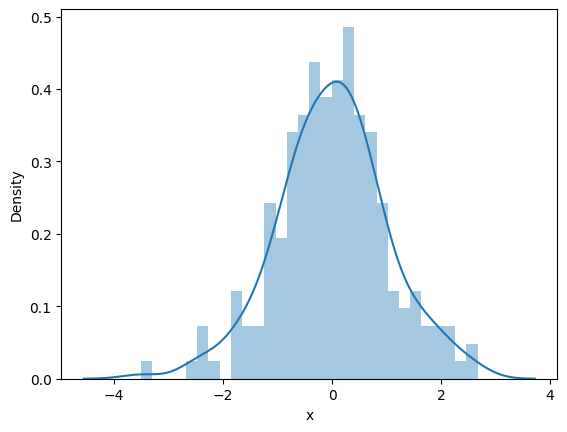

In [12]:
# histogram of the simulated independent variable x
# which we know follows a Gaussian distribution

sns.distplot(data['x'], bins=30)

<ipython-input-14-85d7b1742e2f>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(fetch_california['AveRooms'], bins=30)


<Axes: xlabel='AveRooms', ylabel='Density'>

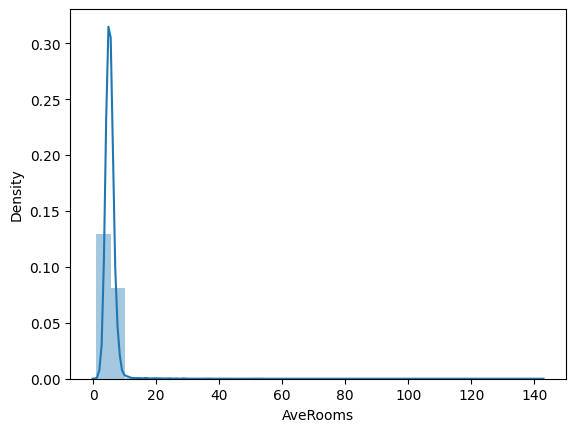

In [14]:
# histogram of the variable AveRooms from the fetch_california
# house price dataset from sklearn
# AveRooms is the average number of rooms per household

sns.distplot(fetch_california['AveRooms'], bins=30)

<ipython-input-15-207959adad42>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(fetch_california['AveBedrms'], bins=30)


<Axes: xlabel='AveBedrms', ylabel='Density'>

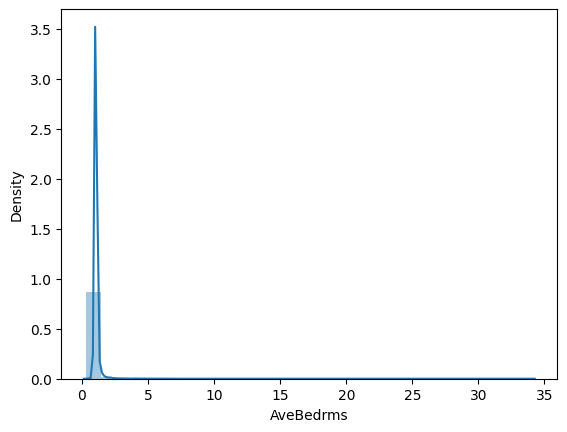

In [15]:
# histogram of the variable AveBedrms
# (average number of bedrooms per household)

sns.distplot(fetch_california['AveBedrms'], bins=30)

Normality can be also assessed by Q-Q plots. In a Q-Q plot we plot the quantiles of the variable in the y-axis and the expected quantiles of the normal distribution in the x-axis. If the variable follows a normal distribution, the dots in the Q-Q plot should fall in a 45 degree diagonal line as indicated below.

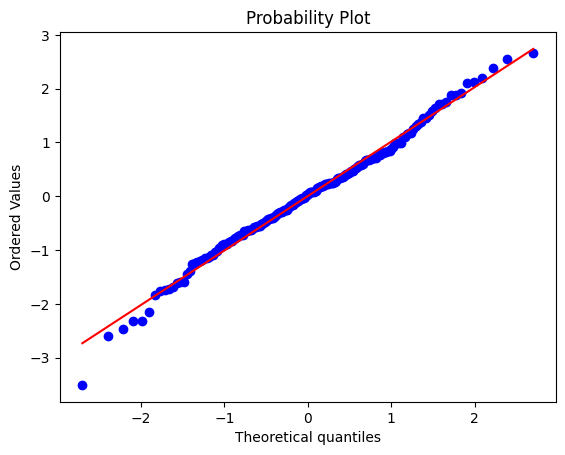

In [16]:
# let's plot the Q-Q plot for the simualted data.
# the dots should adjust to the 45 degree line

stats.probplot(data['x'], dist="norm", plot=plt)
plt.show()

Most of the observations of x fall on the 45 degree line, which suggests that the distribution is approximately Gaussian, with some deviation towards the larger and smaller values of the variable.

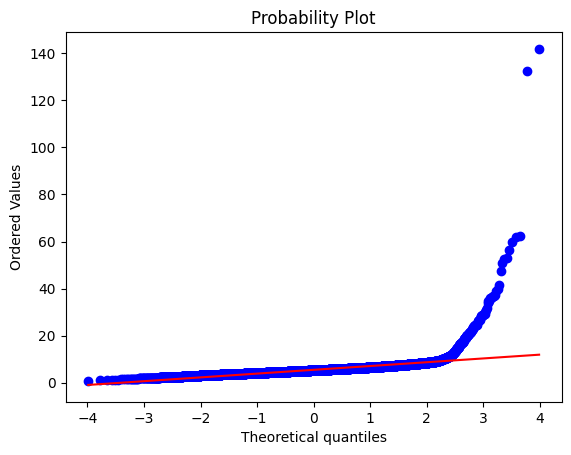

In [17]:
# let's do the same for AveRooms
stats.probplot(fetch_california['AveRooms'], dist="norm", plot=plt)
plt.show()

AveRooms does not follow a Gaussian distribution as most of its observations deviate from the 45 degree line in the Q-Q plot.